# Numerisk Integrasjon

Gitt en funksjon $f(x)$ er integralet $\int_a^b f(x) dx$ gitt ved arealet til området mellom $x$-aksen og grafen til $f(x)$ på intervallet fra $a$ til $b$.

Arealet til områder under $x$-aksen teller negativt i integralet!

![integral](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/Integral_example.svg?raw=1)
[By I, KSmrq, CC BY-SA 3.0](https://commons.wikimedia.org/w/index.php?curid=2268147)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Riemann summer

Gitt en funksjon $f \colon [a, b] \to \mathbb R$ og lister
$$\mathbf x = [x_0, x_1, \dots, x_n]$$
og
$$\mathbf y = [f(x_0), f(x_1), \dots, f(x_n)]$$
slik at
$$a = x_0 < x_1 < \dots < x_n = b$$
kan vi tilnærme integralet $\int_a^b f(x) dx$ ut ifra bare tallene på disse listene.

## Eksempel

La $f(x)$ være funksjonen
$$f(x) = 2\sin(x) + \cos(x).$$
For $a = -2$ og $b = 2$ er integralet

$$\int_a^b f(x) dx = \int_{-2}^{2} (2 \sin(x) + \cos(x))dx$$

gitt ved arealet til det blå området minus arealet til det røde området på figuren under:

![mixedIntegral](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/mixedIntegral.png?raw=1)

Vi lar $x$ være listen
$$\mathbf x = [-2, -1, 0, 1, 2].$$
slik at listen $\mathbf y$ i dette eksemplet blir
$$ \mathbf y = [f(-2), f(-1), f(0), f(1), f(2)]$$
Vi kan beregne tallene på listen $\mathbf y$ ved å sette inn verdier i funksjonen $f(x)$:
$$\mathbf y = [-2.23474169, \ -1.14263966,\   1        ,\  2.22324428,\  1.40244802].$$


Funksjonsverdiene i listen $\mathbf y$ kan illustreres ved å tegne punktene $(-2, f(-2))$, $(-1, f(-1))$ og så videre på figuren:

![mixedIntegral](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/mixedIntegral_med_punkter.png?raw=1)

**Tilnærming til integralet**

De fleste funksjoner endrer seg ikke så mye på et lite intervall. Derfor kan det være rimelig å erstatte funksjonen vi vil integrere med en funksjon som er konstant på intevaller mellom punktene vi tegnet inn i figuren. Figurene under viser to måter å gjøre det på.

### Venstre Riemann sum
![mixedIntegralL](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/mixedIntegralL.png?raw=1)

### Høyre Riemann sum
![mixedIntegralR](https://github.com/mbr085/V26MAT102/blob/main/notebooks/uke4/figures/mixedIntegralR.png?raw=1)


**For å oppnå en god tilnærming trenger vi å dele opp i flere små intervaller**

La oss regne ut venstre- og høyre summene angitt i figurene over.

In [ ]:
# først produserer vi listen x

n = 4  # antall intervaller
a = -2 # venstre endepunkt
b = 2  # høyre endepunkt

x = np.linspace(a, b, n + 1)

In [ ]:
# dernest forteller vi python om funksjonen f

def f(x):
    return 2*np.sin(x) + np.cos(x)

In [ ]:
# dernest produserer vi listen y av funksjonsverdier

y = f(x)

### Oppgave

Sjekk at listene `x` og `y` faktisk inneholder de tallene vi har forutsagt.

In [ ]:
# vi beregner nå våre tilnærminger til integralet

dx = np.diff(x) # steglengdene i listen x
venstre_riemann = dx * np.cumsum(y[:-1]) # tilnærming av integralfunksjonen ved venstre endepunkter
høyre_riemann = dx * np.cumsum(y[1:]) # tilnærming av integralfunksjonen ved høyre endepunkter

venstre_riemann_sum = venstre_riemann[-1] # venstre Riemann sum
høyre_riemann_sum = høyre_riemann[-1] # høyre Riemann sum

venstre_riemann_sum, høyre_riemann_sum # vi skriver resultatet ut

(np.float64(-0.15413707846222646), np.float64(3.4830526288405004))

### Spørsmål

1. Synes du dette er gode tilnærminger? Hvodan kan du endre koden slik at intervallene blir mindre og tilnærmingen blir bedre?
2. Beskriv hva `dx` er for noe. Hva skjer hvis du skriver `np.diff([0, 1, 1, 2, 3, 5, 8, 13, 21])`? Hvorfor blir resultatet som det blir?
3. Beskriv hvordan tallene i listene `y[:-1]` og `y[1:]` henger sammen med tallene i listen `y`.
4. Hva blir resultatet av `np.cumsum(np.diff([0, 1, 1, 2, 3, 5, 8, 13, 21]))`? Beskriv hva funksjonen `np.cumsum` gjør og forklar resultatet.

### Integralfunksjonen
Fra skolen har vi lært å integrere:

$$F(t) = \int_{a}^t (2\sin(x) + \cos(x)) dx = -2\cos(t) + \sin(t) + 2\cos(a) - \sin(a)$$

**Plot av de tilnærmede integralfunksjonene**

In [ ]:
# vi forteller python om integralfunksjonen F(t)
# vi lar tallet a være en parameter i funksjonen

def F(t, a):
    return (-2 * np.cos(t) + np.sin(t)) - (-2 * np.cos(a) + np.sin(a))

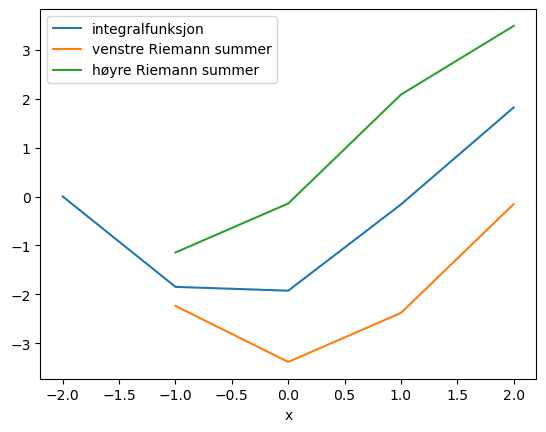

In [ ]:
plt.plot(x, F(x,a), label='integralfunksjon')
plt.plot(x[1:], venstre_riemann, label='venstre Riemann summer')
plt.plot(x[1:], høyre_riemann, label = 'høyre Riemann summer')
plt.xlabel('x')
plt.legend()

## Oppgave

Kjør koden over for $n = 40$ intevaller. Prøv også andre verdier av $n$. Forklar hva du observerer.

## Oppgave

Forklar i egne ord hva funksjonen np.cumsum gjør. Skriv en funksjon i python uten bruk an numpy som gjør det samme.

## Eksempel

Vi ser nå på funksjonen $f(x) = x$ og integralet

$$\int_{-2}^{1} f(x) dx = \int_{-2}^1 xdx$$

### Under finner du:

1. En formel for funksjonen $F(t)$ gitt ved integralet $$F(t) = \int_{-2}^t xdx.$$
2. Modifikasjon av koden over til å tilnærme integralet $\int_{-2}^1 xdx$. (Prøv både å bruke 4 og 40 intevaller.)

In [ ]:
# først produserer vi listen x

n = 4  # antall intervaller
a = -2 # venstre endepunkt
b = 1  # høyre endepunkt

x = np.linspace(a, b, n + 1)

In [ ]:
# dernest forteller vi python om funksjonen f

def f(x):
    return x

In [ ]:
# dernest produserer vi listen y av funksjonsverdier

y = f(x)

In [ ]:
# vi beregner nå våre tilnærminger til integralet

dx = np.diff(x) # steglengdene i listen x
venstre_riemann = dx * np.cumsum(y[:-1]) # tilnærming av integralfunksjonen ved venstre endepunkter
høyre_riemann = dx * np.cumsum(y[1:]) # tilnærming av integralfunksjonen ved høyre endepunkter

venstre_riemann_sum = venstre_riemann[-1] # venstre Riemann sum
høyre_riemann_sum = høyre_riemann[-1] # høyre Riemann sum

venstre_riemann_sum, høyre_riemann_sum # vi skriver resultatet ut

(np.float64(-2.625), np.float64(-0.375))

In [ ]:
venstre_riemann

array([-1.5   , -2.4375, -2.8125, -2.625 ])

In [ ]:
høyre_riemann

array([-0.9375, -1.3125, -1.125 , -0.375 ])

In [ ]:
integral = 0.5 * x**2 - 2

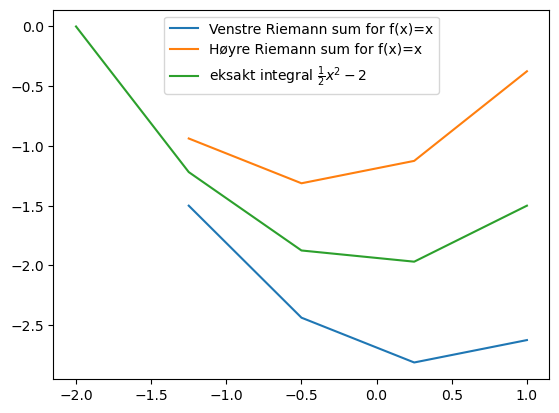

In [ ]:
plt.plot(x[1:], venstre_riemann, label='Venstre Riemann sum for f(x)=x')
plt.plot(x[1:], høyre_riemann, label='Høyre Riemann sum for f(x)=x')
plt.plot(x, integral, label=r'eksakt integral $\frac{1}{2}x^2 - 2$')
plt.legend()